In [1]:
import cv2
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from numpy.linalg import inv
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score

2023-12-13 18:59:47.818617: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-13 18:59:47.818674: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-13 18:59:47.819483: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-13 18:59:47.825209: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-13 18:59:48.609622: W tensorflow/compiler/tf2

In [2]:
def build_filters():
    filters = []
    ksize = 28
    for theta in np.linspace(0, np.pi, 32):
        kern = cv2.getGaborKernel(
            (ksize, ksize), 4.0, theta, 10.0, 0.5, 0, ktype=cv2.CV_32F
        )
        kern /= 1.5 * kern.sum()
        filters.append(kern)
    return filters


def process(img, filters):
    accum = []
    for kern in filters:
        fimg = cv2.filter2D(img, cv2.CV_8UC3, kern)
        accum.append(fimg.reshape(-1))
    return np.vstack(accum).T


def get_w_star(X, y):
    return inv(X.T @ X) @ X.T @ y

In [8]:
(images, labels), (test_X, test_y) = mnist.load_data()
is_1_2 = (labels == 0) | (labels == 2)
labels = labels[is_1_2][:1000]
images = images[is_1_2][:1000]


F_list = []
for img in images:
    F = process(img, build_filters())
    F_list.append(F)

kf = KFold(n_splits=10)
m = 10
for i, (train, test) in enumerate(kf.split(labels)):
    F_train = [F_list[img_indx][:, m] for img_indx in train]
    F_train = np.vstack(F_train).astype(float)

    F_test = [F_list[img_indx][:, m] for img_indx in test]
    F_test = np.vstack(F_test).astype(float)

    y_test = labels[test].astype(float)
    y_train = labels[train].astype(float)

    w_star = get_w_star(F_train, y_train)

    y_predict_test = np.round(F_test @ w_star)
    score_test = accuracy_score(y_test, y_predict_test)

    y_predict_train = np.round(F_train @ w_star)
    score_train = accuracy_score(y_train, y_predict_train)

    print(f"fold #{i} accuracy test {score_test} | accuracy train {score_train}|")

fold #0 accuracy test 0.38 | accuracy train 1.0|
fold #1 accuracy test 0.39 | accuracy train 1.0|
fold #2 accuracy test 0.41 | accuracy train 1.0|
fold #3 accuracy test 0.43 | accuracy train 0.9988888888888889|
fold #4 accuracy test 0.45 | accuracy train 1.0|
fold #5 accuracy test 0.45 | accuracy train 1.0|
fold #6 accuracy test 0.42 | accuracy train 0.9988888888888889|
fold #7 accuracy test 0.3 | accuracy train 0.9988888888888889|
fold #8 accuracy test 0.51 | accuracy train 1.0|
fold #9 accuracy test 0.38 | accuracy train 1.0|


In [5]:
y_predict = np.round(F_test @ w_star)
accuracy_score(y_test, y_predict)

0.38

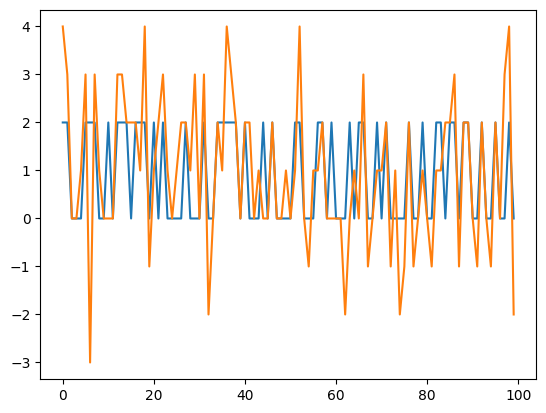

In [6]:
plt.plot(y_test)
plt.plot(y_predict)

In [7]:
m = 5
X = [F[:, m] for F in F_list]
X = np.vstack(X).astype(float)
y = Y_train.reshape(-1, 1).astype(float)

NameError: name 'Y_train' is not defined

In [ ]:
w_star = inv(X.T @ X) @ X.T @ y
w_star1 = inv(X.T @ X) @ (X.T @ y)
w_star2 = X.T @ inv(X @ X.T) @ y

In [ ]:
from sklearn import datasets

In [ ]:
print(w_star1[0], w_star[0])

[-0.01438057] [-0.01438057]


In [ ]:
import cvxpy as cp

m = 30
n = 20
A = np.random.randn(m, n)
b = np.random.randn(m)

# Construct the problem.
x = cp.Variable(n)
objective = cp.Minimize(cp.sum_squares(A @ x - b))
constraints = [0 <= x, x <= 1]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
# The optimal value for x is stored in `x.value`.
print(x.value)
# The optimal Lagrange multiplier for a constraint is stored in
# `constraint.dual_value`.
print(constraints[0].dual_value)

In [ ]:
F[:, 0].shape

(784,)

In [ ]:
A = np.random.random((5, 3))
A[-1, 0] = 4
t = np.array([1, 2, 3]).reshape(3, -1)

In [ ]:
inv(A @ A.T) @ A @ t

array([[ 5.91413955],
       [ 1.99965168],
       [ 2.35029462],
       [-2.17967294],
       [-0.21306528]])

In [ ]:
inv(A @ A.T) @ (A @ t)

array([[ 4.16413955],
       [ 2.18715168],
       [ 2.78779462],
       [-1.30467294],
       [-0.61931528]])

In [ ]:
inv(A @ A.T)

array([[ 3.77582622e+15,  7.28212323e+15, -5.28389077e+15,
        -7.85877453e+15,  1.89572213e+15],
       [ 8.40739414e+15, -1.78407928e+15,  9.90797804e+14,
         8.70431847e+14, -1.47438269e+15],
       [-6.08139580e+15,  1.02741988e+15, -5.30236017e+14,
        -3.61130021e+14,  9.83231967e+14],
       [-9.00719925e+15,  9.97630490e+14, -4.13902962e+14,
         0.00000000e+00,  1.29043081e+15],
       [ 2.25179981e+15, -1.35260784e+15,  8.85338778e+14,
         1.12589991e+15, -6.71701403e+14]])

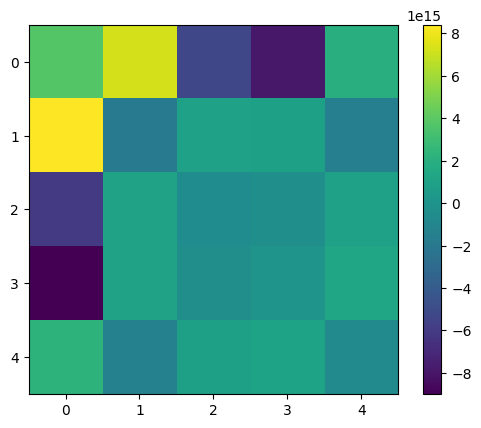

In [ ]:
plt.imshow(inv(A @ A.T))
plt.colorbar()

In [ ]:
B = np.random.random((5, 5))

In [ ]:
B @ (A @ t)

array([[ 7.88110306],
       [12.42673991],
       [14.19798221],
       [15.37210477],
       [10.33308528]])

In [ ]:
B @ A @ t

array([[ 7.88110306],
       [12.42673991],
       [14.19798221],
       [15.37210477],
       [10.33308528]])